In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("result_topics_df.json")

In [3]:
df

,paragraph,hour,day,month,year,filename,time,lemmatized_text,nemo_status,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.570482e+12,תם שימוע ממשלה ינימין נתניהו עשר דיון תיק אלף ...,True,0,7,0.6611,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש..."
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.570482e+12,גבר שלושים נורה רחוב עלייה לוד חובש מגן דוד אד...,True,1,0,0.5212,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש..."
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.570482e+12,"רמטכ""ל רב אלוף כוכבי מזהיר הערב פגיעה התרחש הג...",True,2,5,0.8133,"צה, שר, דיווח, ביטחון, משפט, גנץ, חייל, סוריה,..."
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.570482e+12,שר תחבורה בצלאל סמוטריץ' הודיע עמוד פייסבוק בע...,True,3,0,0.3446,"משטרה, ירושלים, חלה, תאונה, רב, רכב, כביש, איש..."
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.570482e+12,נשיא ארץ ברית טראמפ הודיע הציב קו אדומי תורכי ...,True,4,7,0.3810,"ממשלה, מדינה, נתניהו, ארץ_ברית, מפלגה, נשיא, ש..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.612858e+12,לימודים התחדש מחרתיים הערב התכנס ועדה שר קורונ...,True,4737,2,0.9757,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף..."
4738,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.612858e+12,בחירות אלפיים עשרים יושב ימינה כינס נפתל בנט ס...,True,4738,4,0.9513,"ממשלה, נתניהו, שר, גנץ, בנימין, מפלגה, מאה, יו..."
4739,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.612858e+12,מחדל נבטי מהלך לילה אותר נקודה בגדר ככל נמלט ח...,True,4739,1,0.5740,"מאה, ישראלי, לילה, קורונה, שוחח, אלף, נשיא, רב..."
4740,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,1.612858e+12,דיון פתיחה מסחר באמצעות דרכון ירוק נמשך הערב צ...,True,4740,2,0.9763,"משרד, בריאות, קורונה, חינוך, מאה, חלה, שר, אלף..."


In [4]:
df.Dominant_Topic = df.Dominant_Topic.apply(lambda x : x+1)

# View examples

In [5]:
from pprint import pprint

In [6]:
topic_index = 3
topic_df = df[(df.Dominant_Topic == topic_index) & (df.Topic_Perc_Contrib > 0.9)]
# pprint(topic_df.paragraph.values.tolist())

# Get top paragraphs for each topic

In [7]:
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

In [8]:
sent_topics_sorteddf.drop(["hour", "day", "month", "year", "filename", "time", "lemmatized_text", "nemo_status", "Document_No", "Keywords"], inplace=True, axis=1)

In [9]:
sent_topics_sorteddf

,paragraph,Dominant_Topic,Topic_Perc_Contrib
0,20התרסקות מטוס הסנונית בנובמבר האחרון: מתחקיר ...,1,0.9844
1,"נכה צה""ל בן עשרים ושש הצית את עצמו במשרדי אגף ...",1,0.9832
2,אלפי בני אדם מוחים בשעה זו בנצרת ובטמרה נגד הת...,1,0.9825
3,21 משטרת הקפיטול בארצות הברית ביקשה להאריך את ...,1,0.9814
4,21הסתדרות מרחב ירושלים הודיעה לעירייה על הפסקת...,1,0.9810
5,21 שלוש שעות לסגירת הרשימות לכנסת העשרים וארבע...,2,0.9854
6,<<\nנשיא ארצות הברית ג''ו ביידן הודיע כי הוא מ...,2,0.9841
7,"משפחתו של החייל משה תמם זכרונו לברכה, שנרצח בפ...",2,0.9841
8,המופע של טראמפ: נשיא ארצות הברית קיים הלילה עצ...,2,0.9821
9,<<\nכלת פרס ישראל בתחום חקר הספרות העברית והכל...,2,0.9805


In [10]:
# sent_topics_sorteddf.to_csv("top_paras.csv")

# Events Evaluation

In [11]:
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti

In [64]:
HEB_STOPWORDS_PATH = "../added_material/heb_stopwords.txt"
CUSTOM_STOPWORDS = [
    "בעקבות",
    "נמסר",
    "כתבתנו",
    "כתבנו",
    "הבוקר",
    "הלילה",
    "אמש",
    "לענייני",
    "מוסר",
    "מוסרת",
    "מוסרת",
    "כי",
    "כתב",
    "כתבת",
    "הערב",
    "בירושלים"
]

def remove_stopwords(s, stopwords):
    word_list = s.split()
    output = [w for w in word_list if not w in stopwords]
    return " ".join(output)

with open(HEB_STOPWORDS_PATH) as f:
    heb_stopwords = [x.rstrip() for x in f]

df.loc[:, "paragraph_no_stopwords"] = df.paragraph.apply(lambda x: remove_stopwords(x,
                                                                           CUSTOM_STOPWORDS + heb_stopwords))

In [250]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def generate_word_cloud(time_df, font_path, file_name):
    text = " ".join(time_df.paragraph_no_stopwords.tolist())
    wordcloud = WordCloud(font_path=font_path, width=1000, height=700, background_color="white").generate(text)
    fig, ax = plt.subplots(figsize=[10,10])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    fig.tight_layout(pad=0)
    fig.savefig(file_name, dpi=300)

time_delta = pd.Timedelta("5 day")
font_path = "/System/Library/Fonts/Supplemental/Arial.ttf"

def generate_topics_dist_graph(time_df, y_label, file_name):
    fig, ax = plt.subplots(figsize=(12,5))
    percentage = lambda i: len(i) / float(len(time_df)) * 100
    sns.barplot(x="Dominant_Topic", y="Dominant_Topic", data=time_df, ax=ax, estimator=percentage)
    ax.set_yticks(np.arange(0,40,5))
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
    ax.set_xlabel("Dominant Topic")
    ax.set_ylabel( y_label)
    ax.set_xticklabels(["1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])
    fig.tight_layout(pad=0)
    fig.savefig(file_name, dpi=300)
    
def generate_topics_dist_graph_comparative(time_df, all_df, event_name, file_name):
    fig, ax = plt.subplots(figsize=(12,5))
    time_counts = time_df.Dominant_Topic.value_counts().sort_index()
    time_percentages = time_counts.values / time_counts.sum() * 100
    all_counts = all_df.Dominant_Topic.value_counts().sort_index()
    all_percentages = all_counts.values / all_counts.sum() * 100
    ax.bar(np.arange(1,9), time_percentages, 1/3 ,color='red',label=event_name, align='edge')
    ax.bar(np.arange(1,9)-1/3, all_percentages, 1/3 ,color='b',label='All Data',align='edge')
    ax.legend()
    ax.set_xlabel("Dominant Topic")
    ax.set_ylabel("Percent of Paragraphs")
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
    ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])
    fig.tight_layout(pad=0)
    fig.savefig(file_name, dpi=300)

# Topics Distrubution in Data

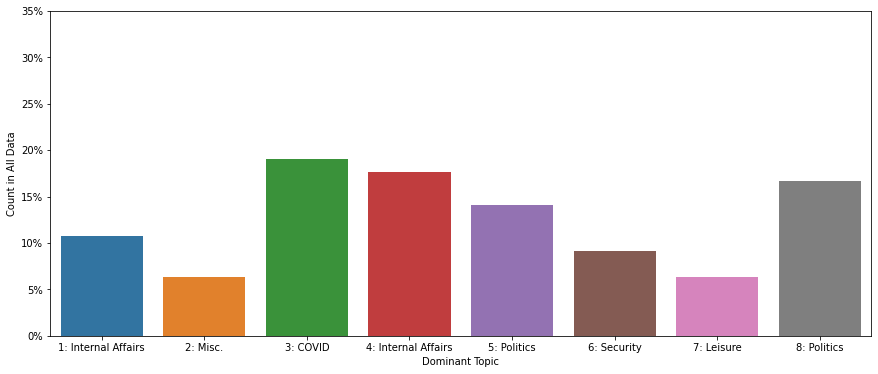

In [239]:
generate_topics_dist_graph(df, "Count in All Data", "all_data_distribution2.png")

## 9/4/2019 - first elections

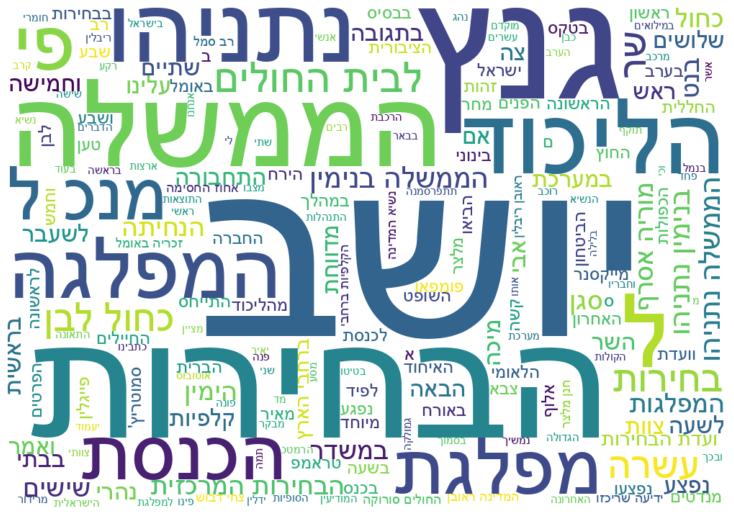

In [240]:
event_time = pd.Timestamp("2019-04-09 00:00:00")
first_elections_df = df[(df["time"] >= event_time - time_delta) & (df["time"] <= event_time + time_delta)]
generate_word_cloud(first_elections_df, font_path, "09042019.png")

<ipython-input-236-6195145cd3eb>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])


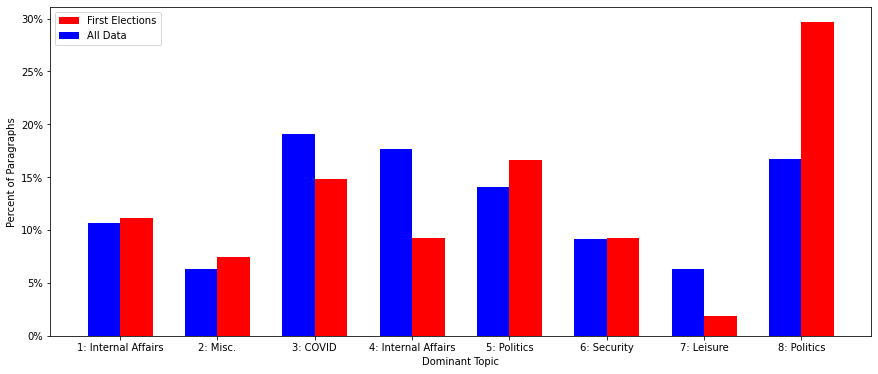

In [237]:
generate_topics_dist_graph_comparative(first_elections_df, df, "First Elections", "first_elections_distribution.png")

## 12/11/2019 - missle attack at Israel after assassination of Jihad terrorist

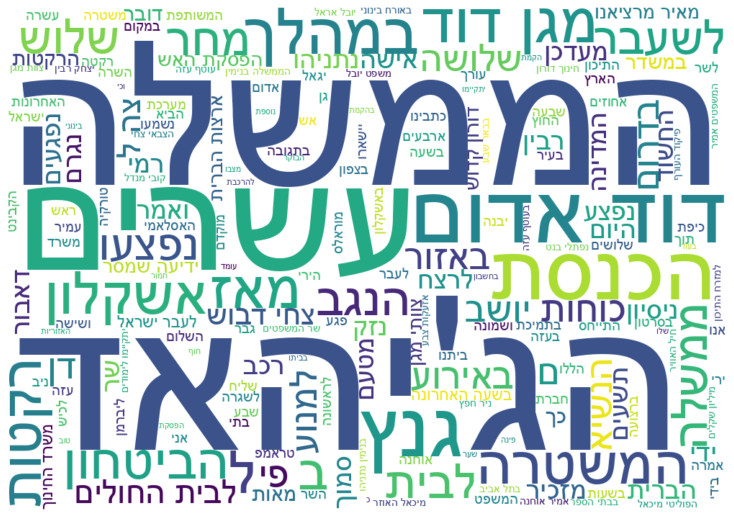

In [241]:
event_time = pd.Timestamp("2019-11-12 00:00:00")
first_elections_df = df[(df["time"] >= event_time - time_delta) & (df["time"] <= event_time + time_delta)]
generate_word_cloud(first_elections_df, font_path, "12112019.png")

<ipython-input-238-20767bf1ddfb>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])


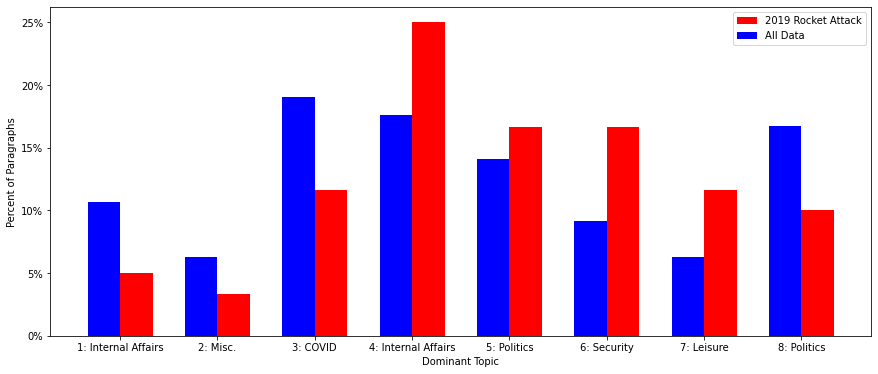

In [242]:
generate_topics_dist_graph_comparative(first_elections_df, df, "2019 Rocket Attack", "rocket_attack_distribution.png")

## 2/3/2020 - third elections 

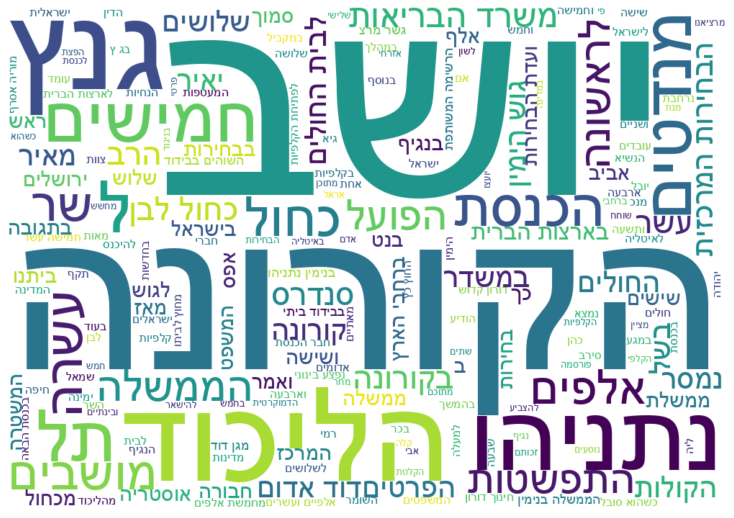

In [244]:
event_time = pd.Timestamp("2020-03-02 00:00:00")
first_elections_df = df[(df["time"] >= event_time - time_delta) & (df["time"] <= event_time + time_delta)]
generate_word_cloud(first_elections_df, font_path, "02032019.png")

<ipython-input-238-20767bf1ddfb>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])


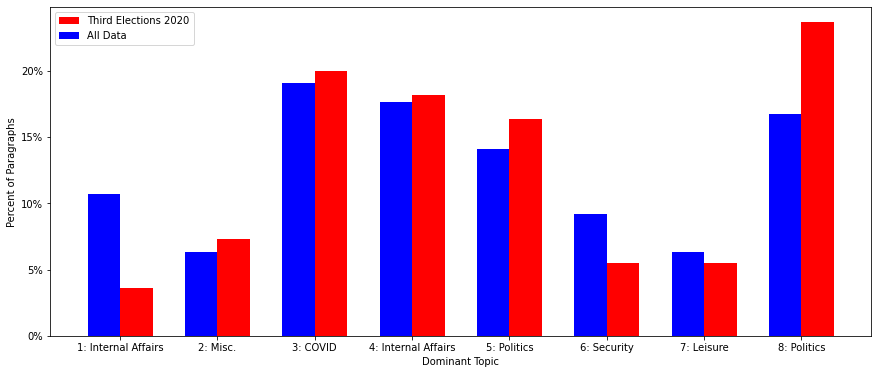

In [246]:
generate_topics_dist_graph_comparative(first_elections_df, df, "Third Elections 2020", "third_elections_distribution.png")

# 8/4/2020 - first quarantine

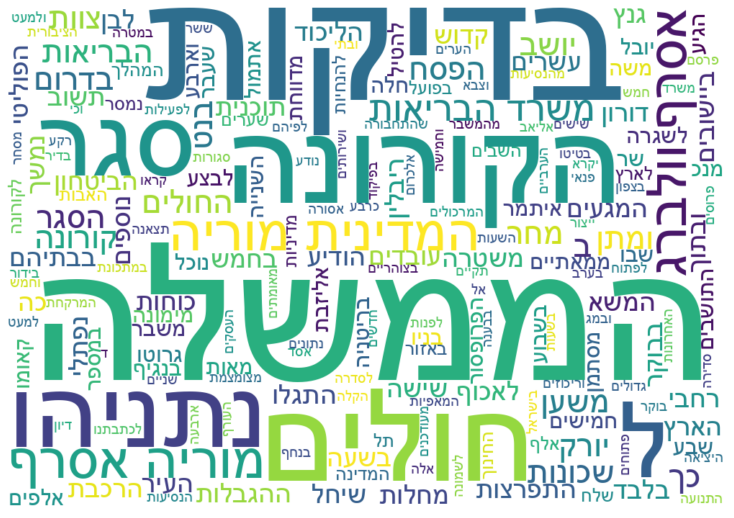

In [247]:
event_time = pd.Timestamp("2020-04-08 00:00:00")
first_elections_df = df[(df["time"] >= event_time - time_delta) & (df["time"] <= event_time + time_delta)]
generate_word_cloud(first_elections_df, font_path, "08042019.png")

<ipython-input-254-e2f5ecd2824f>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])


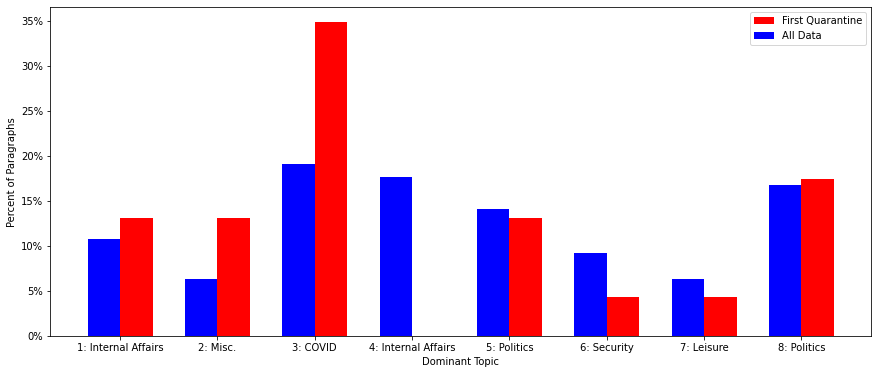

In [254]:
time_df = first_elections_df
all_df = df
event_name = "First Quarantine"
file_name = "first_quarantine_distribution.png"

fig, ax = plt.subplots(figsize=(12,5))
time_counts = time_df.Dominant_Topic.value_counts().sort_index()
time_percentages = time_counts.values / time_counts.sum() * 100
all_counts = all_df.Dominant_Topic.value_counts().sort_index()
all_percentages = all_counts.values / all_counts.sum() * 100
ax.bar(np.array([1,2,3,5,6,7,8]), time_percentages, 1/3 ,color='red',label=event_name, align='edge')
ax.bar(np.arange(1,9)-1/3, all_percentages, 1/3 ,color='b',label='All Data',align='edge')
ax.legend()
ax.set_xlabel("Dominant Topic")
ax.set_ylabel("Percent of Paragraphs")
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])
fig.tight_layout(pad=0)
fig.savefig(file_name, dpi=300)

# Comparison between before COVID and after

<ipython-input-256-3b2a9a8b2f9b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])


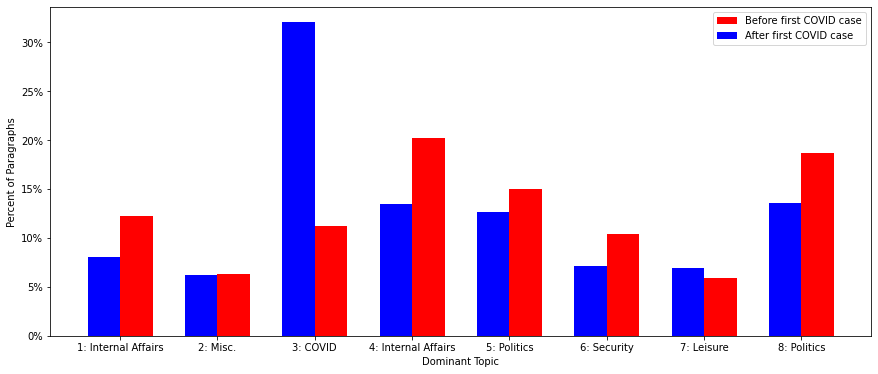

In [256]:
first_covid_case = pd.Timestamp("2020-02-27 00:00:00")
df_before_covid = df[df.time < first_covid_case]
df_after_covid = df[df.time >= first_covid_case]

time_df = df_before_covid
all_df = df_after_covid
event_name = "Before first COVID case"
file_name = "before_after_covid_comparison.png"

fig, ax = plt.subplots(figsize=(12,5))
time_counts = time_df.Dominant_Topic.value_counts().sort_index()
time_percentages = time_counts.values / time_counts.sum() * 100
all_counts = all_df.Dominant_Topic.value_counts().sort_index()
all_percentages = all_counts.values / all_counts.sum() * 100
ax.bar(np.arange(1,9), time_percentages, 1/3 ,color='red',label=event_name, align='edge')
ax.bar(np.arange(1,9)-1/3, all_percentages, 1/3 ,color='b',label='After first COVID case',align='edge')
ax.legend()
ax.set_xlabel("Dominant Topic")
ax.set_ylabel("Percent of Paragraphs")
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
ax.set_xticklabels(["blank", "1: Internal Affairs", "2: Misc.", "3: COVID", "4: Internal Affairs", "5: Politics", "6: Security", "7: Leisure", "8: Politics"])
fig.tight_layout(pad=0)
fig.savefig(file_name, dpi=300)